In [181]:
import pandas as pd;

In [182]:
# from urllib.request import urlretrieve
# medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
# urlretrieve(medical_charges_url, 'medical.csv')
# print('Radha');

In [183]:
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [184]:
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [185]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [186]:
import plotly.express as px;
import matplotlib
import matplotlib.pyplot as plt;
import seaborn as sns;

In [187]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [188]:
medical_df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

**age analysis**

In [189]:
fig = px.histogram(medical_df , x = 'age', marginal='box' , nbins = 47, title='Age Distribution')
fig.update_layout(bargap=0.1);
fig.show()

**bmi**

looking like normal or gaussian distrubution data is centered around mean and decreasing away from mean

In [190]:
fig = px.histogram(medical_df , x='bmi', marginal='box', color_discrete_sequence=['red'], title='bmi distribution')
fig.update_layout(bargap=0.1);
fig.show()

In [191]:
fig = px.histogram(medical_df , x='charges' ,color='smoker', marginal='box', title='annual charges distribution', color_discrete_sequence=['red' , 'black']);
fig.update_layout(bargap=0.1);
fig.show()

In [192]:
fig = px.histogram(medical_df , x='charges' ,color='sex', marginal='box', title='annual charges distribution', color_discrete_sequence=['red' , 'black']);
fig.update_layout(bargap=0.1);
fig.show()

In [193]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [194]:
fig = px.histogram(medical_df , x='charges' ,color='region', marginal='box', title='annual charges distribution', color_discrete_sequence=['red' , 'black', 'blue' , 'green']);
fig.update_layout(bargap=0.1);
fig.show()

In [195]:
fig = px.histogram(medical_df , x='region' , marginal='box', title='region distribution', color_discrete_sequence=['violet']);
fig.update_layout(bargap=0.1);
fig.show()

In [196]:
medical_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [197]:
fig = px.histogram(medical_df , x='smoker', color='sex', title='smoker')
fig.update_layout(bargap=0.1);
fig.show()

In [198]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [199]:
fig = px.histogram(medical_df ,marginal='box', x='charges', color='children')
fig.update_layout(bargap=0.1);
fig.show()

**age and charges**

In [200]:
fig = px.scatter(medical_df , x='age', y='charges', color='smoker',opacity=0.8,hover_data=['sex'], title='age vs charges')
fig.update_traces(marker_size=5)
fig.show()

**bmi and charges**

In [201]:
fig = px.scatter(medical_df , x='bmi', y='charges', color='smoker', color_discrete_sequence=['red' , 'black'] ,opacity=0.8,hover_data=['sex'], title='bmi vs charges')
fig.update_traces(marker_size=5)
fig.show()

In [202]:
px.violin(medical_df , x='children', y='charges')


### **correlation coefficient**

In [203]:
print(medical_df.charges.corr(medical_df.age))
print(medical_df['charges'].corr(medical_df['age']))
print(medical_df['age'].corr(medical_df['charges']))

0.2990081933306478
0.2990081933306478
0.29900819333064776


In [204]:
print(medical_df['charges'].corr(medical_df['bmi']))
print(medical_df['charges'].corr(medical_df['children']))

0.19834096883362887
0.06799822684790487


In [205]:
smoker_values = {'yes': 1, 'no': 0}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df['smoker_numeric'] = smoker_numeric
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [206]:
print(medical_df.charges.corr(medical_df.smoker_numeric))

0.7872514304984778


In [207]:
medical_df.select_dtypes(include=['int64', 'float64']).corr()

,age,bmi,children,charges,smoker_numeric
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker_numeric,-0.025019,0.003750,0.007673,0.787251,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

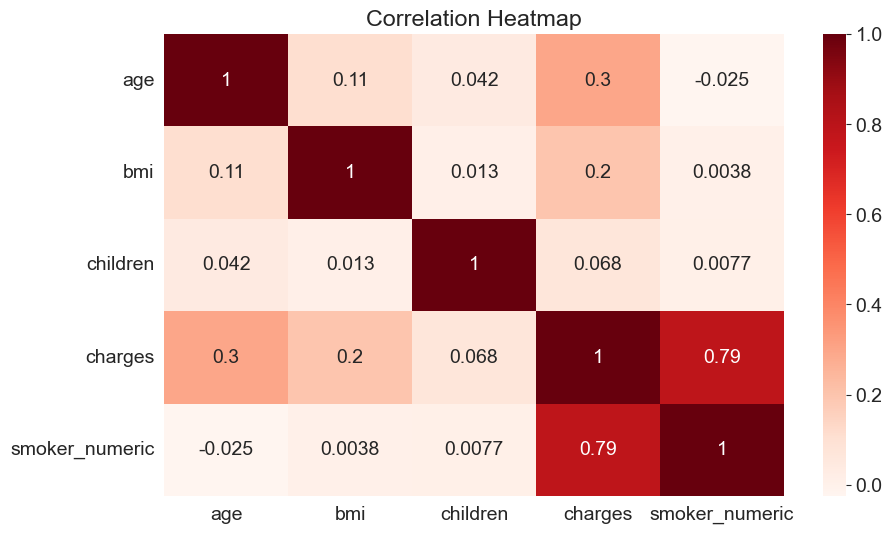

In [208]:
sns.heatmap(medical_df.select_dtypes(include=['int64', 'float64']).corr() , cmap='Reds' , annot=True)
plt.savefig(fname='heatmap.png')
plt.title('Correlation Heatmap')

In [209]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
5,31,female,25.740,0,no,southeast,3756.62160,0
...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

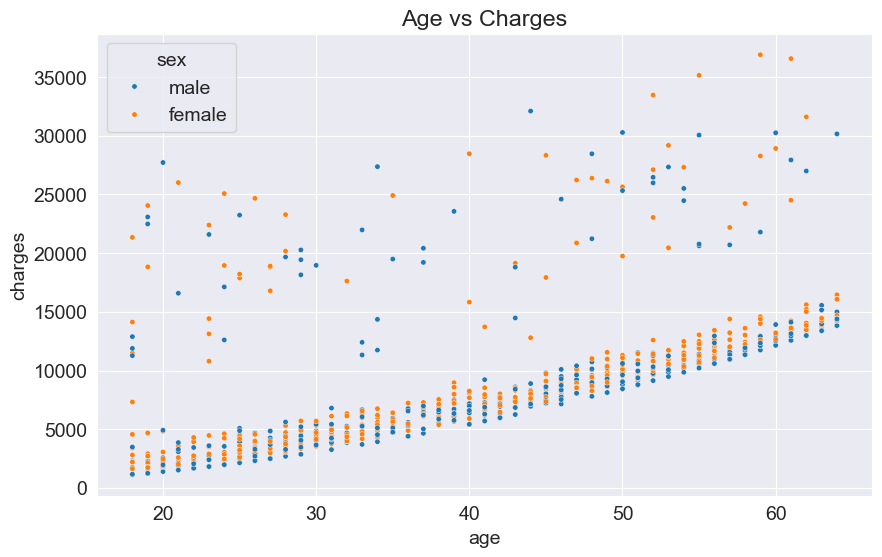

In [210]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df , x='age', y='charges' , alpha=1, s=15, hue='sex')

In [211]:
def estimate_charges(age , w , b):
    return w * age + b;


In [212]:
ages = non_smoker_df.age
w = 120; b = 100;
estimated_charges = estimate_charges(ages , w , b)
estimated_charges

1       2260
2       3460
3       4060
4       3940
5       3820
        ... 
1332    6340
1333    6100
1334    2260
1335    2260
1336    2620
Name: age, Length: 1064, dtype: int64

In [213]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

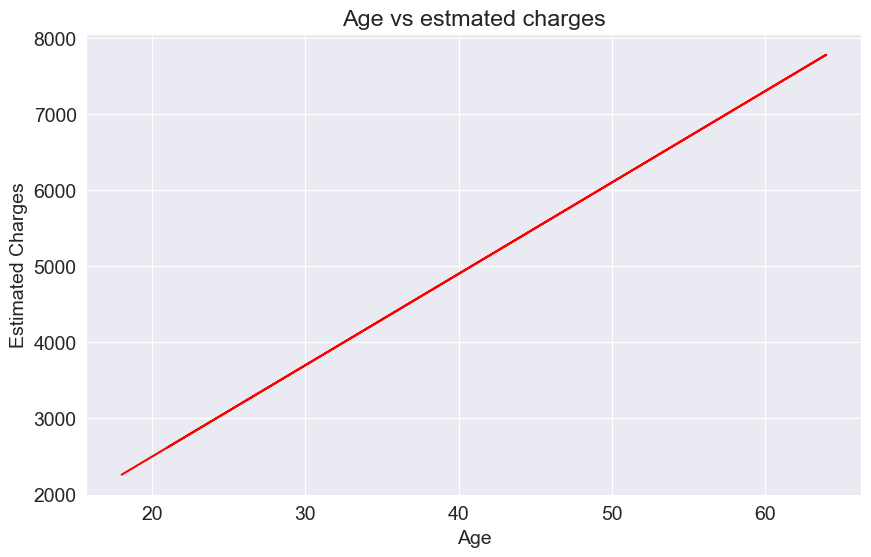

In [214]:
plt.plot(ages,estimated_charges , 'r-');
plt.title( 'Age vs estmated charges')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

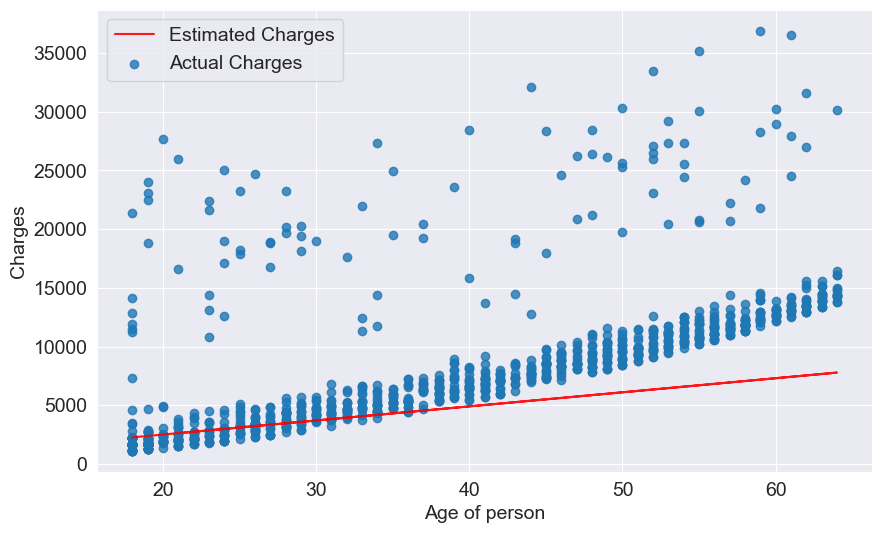

In [215]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9, label='Estimated Charges')
plt.scatter(ages, target, alpha=0.8, label='Actual Charges')
plt.xlabel('Age of person')
plt.ylabel('Charges')
plt.legend(['Estimated Charges', 'Actual Charges'])


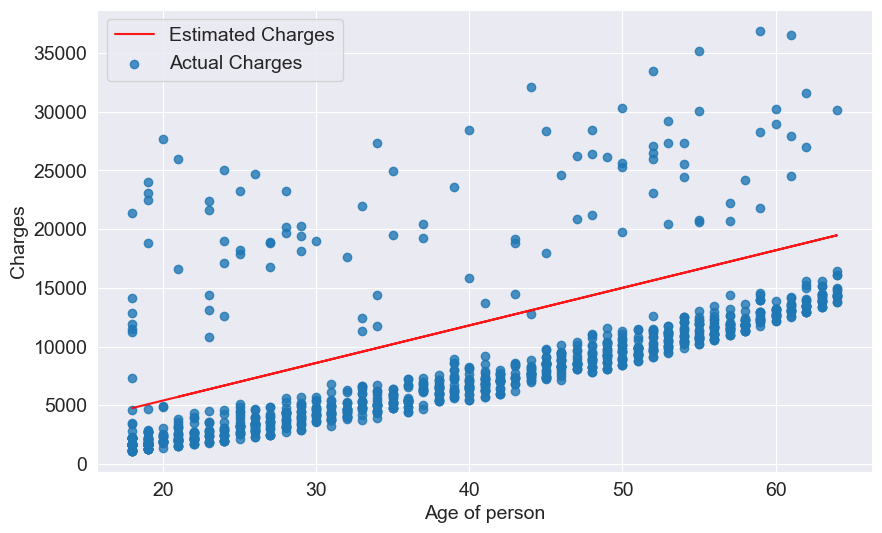

1        4760
2        7960
3        9560
4        9240
5        8920
        ...  
1332    15640
1333    15000
1334     4760
1335     4760
1336     5720
Name: age, Length: 1064, dtype: int64

In [216]:
def try_parameters(w,b):
    target = non_smoker_df.charges
    ages = non_smoker_df.age
    estimated_charges = estimate_charges(ages,w,b)
    plt.plot(ages,estimated_charges, 'r-', alpha=0.9)
    plt.scatter(ages,target,alpha=0.8)
    plt.xlabel('Age of person')
    plt.ylabel('Charges')
    plt.legend(['Estimated Charges', 'Actual Charges'])
    plt.show()
    return estimated_charges

try_parameters(320,-1000)

In [217]:
estimate_charges(45, 320, -1000)

13400

In [218]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [219]:
import numpy as np;

In [220]:
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target-prediction)));

* Lets compute rmse for our models

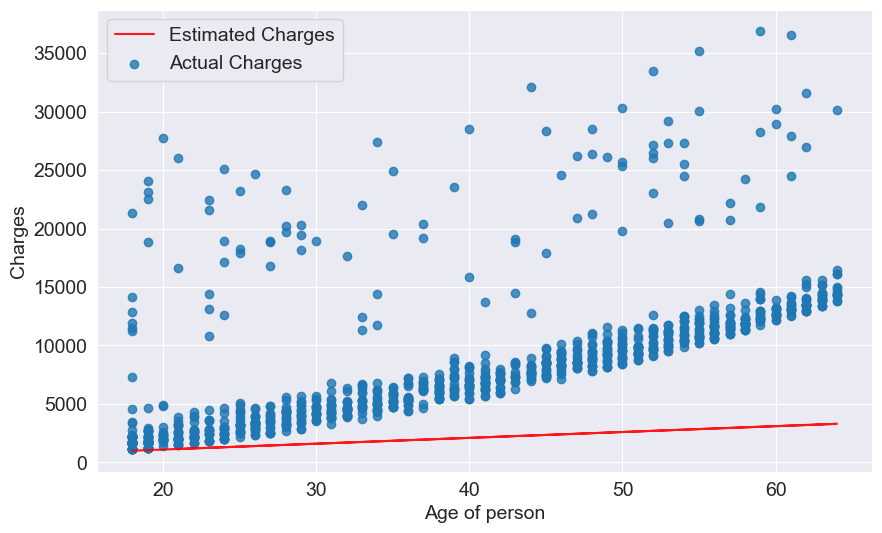

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [221]:
w = 50; b = 100;
try_parameters(w,b)

In [222]:
target = non_smoker_df.charges
prediction = estimate_charges(non_smoker_df.age , w, b);
rmse(target,prediction)

np.float64(8461.949562575493)